In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import seaborn as sns

In [2]:
sleep = pd.read_csv("Sleep_Efficiency.csv")

In [3]:
sleep.head()

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


In [4]:
#rename columns
sleep =  sleep.rename(columns={'Wakeup time': 'wakeup_time', 'Sleep duration': 'sleep_duration', 
                               'Sleep efficiency' : 'sleep_efficiency', 'REM sleep percentage' : 'REM',
                               'Deep sleep percentage' : 'deep_sleep', 'Light sleep percentage' : 'light_sleep',
                               'Caffeine consumption' : 'caffeine_intake', 'Alcohol consumption' : 'alcohol_intake',
                               'Smoking status' : 'smoke', 'Exercise frequency' : 'exercise'})

In [5]:

sleep.head()

,ID,Age,Gender,Bedtime,wakeup_time,sleep_duration,sleep_efficiency,REM,deep_sleep,light_sleep,Awakenings,caffeine_intake,alcohol_intake,smoke,exercise
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


In [6]:
#select variables

sleep1 = sleep[['Age', 'Gender', 'sleep_duration', 'sleep_efficiency','Awakenings', 'caffeine_intake', 'alcohol_intake', 'smoke', 'exercise']]

In [7]:
sleep2 = sleep1.dropna()

In [8]:
sleep2.head()

,Age,Gender,sleep_duration,sleep_efficiency,Awakenings,caffeine_intake,alcohol_intake,smoke,exercise
0,65,Female,6.0,0.88,0.0,0.0,0.0,Yes,3.0
1,69,Male,7.0,0.66,3.0,0.0,3.0,Yes,3.0
2,40,Female,8.0,0.89,1.0,0.0,0.0,No,3.0
3,40,Female,6.0,0.51,3.0,50.0,5.0,Yes,1.0
4,57,Male,8.0,0.76,3.0,0.0,3.0,No,3.0


In [ ]:
# smoker = sleep2[sleep2['Gender'] == 'Female']
# non = sleep2[sleep2['Gender'] == 'Male']

# # Plotting the graph
# plt.scatter(male['caffeine_intake'], male['sleep_efficiency'], label='male',s=20)
# plt.scatter(female['caffeine_intake'], female['sleep_efficiency'], color='red', label='female',s=20)

# plt.legend()
# plt.show()

In [9]:
X = sleep2[['Age', 
            'sleep_duration', 'Awakenings','caffeine_intake', 'alcohol_intake', 
            'exercise']]
y = sleep2[['sleep_efficiency']]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3)

In [12]:
lm = linear_model.LinearRegression()


lm.fit(X_train, y_train)

predicted = lm.predict(X_test)
rmse_lm = np.sqrt(mean_squared_error(predicted,y_test))
rmse_lm

0.10678906424839149

Text(0, 0.5, 'True ')

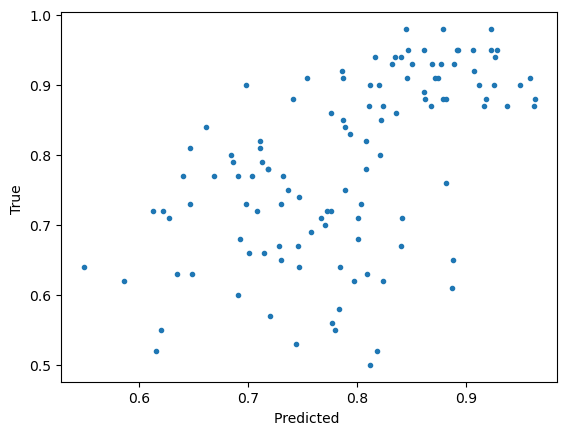

In [13]:
plt.plot(predict, y_test, '.')
plt.xlabel("Predicted ")
plt.ylabel("True ")
#plt.title("Scatter Plot of Predicted and True Log Price (Linear Regression)")
